In [2]:
from json import dumps
from time import sleep
from kafka import KafkaProducer
from kafka import KafkaConsumer
from json import loads
import pyspark
from pyspark.sql import *
import matplotlib.pyplot as plt
import cv2

In [3]:
consumer = KafkaConsumer(
    'my-topic',
     bootstrap_servers=['localhost:9092'],
     auto_offset_reset='earliest',
     enable_auto_commit=True,
     group_id='my-group',
     value_deserializer=lambda x: loads(x.decode('utf-8')))

In [4]:
sc = pyspark.SparkContext()
sqlContext = SQLContext(sc)

/home/patate/.local/lib/python3.8/site-packages/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [5]:
df = []

In [6]:
count = 0
for message in consumer:
    # message value and key are raw bytes -- decode if necessary!
    # e.g., for unicode: `message.value.decode('utf-8')`
    print ("%s:%d:%d:" % (message.topic, message.partition,
                                          message.offset))
    id = message.value['id']
    date = message.value['date']
    data = message.value['data']
    
    df.append(pyspark.Row(id=id, date=date, data=data))

my-topic:1:1247:
my-topic:1:1248:


KeyboardInterrupt: 

In [7]:
df2 = sqlContext.createDataFrame(df)
df2.show()

+----+--------------------+--------------------+
|  id|                date|                data|
+----+--------------------+--------------------+
|1313|"2021-12-15T13:16...|[[[125, 42, 45], ...|
|1313|"2021-12-15T13:16...|[[[48, 11, 178], ...|
+----+--------------------+--------------------+



In [8]:
def to_numpy(img):
    img = np.array([np.array(x, dtype=np.float32) for x in img]) / 255
    return img

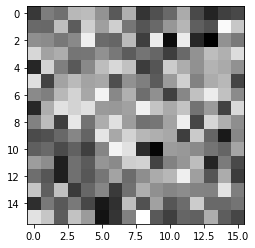

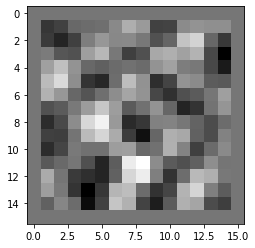

In [12]:
import numpy as np

#select all data from df2 and store it in a df named images
images = df2.select('data')
for e in images.collect():
    img = to_numpy(loads(e.data))
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    with_sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 1, ksize=5)
    plt.imshow(gray, cmap='gray')
    plt.show()
    plt.imshow(with_sobel, cmap='gray')
    plt.show()
    break